Working with Image Data in Python


In [37]:
import pandas as pd
import numpy as np

from glob import glob

import cv2
import matplotlib.pylab as plt

plt.style.use('ggplot')

In [38]:
#import images
leaf_images = glob('input2/*.jpg')

In [39]:
img_mpl = plt.imread('input2.jpg')
img_cv2 = cv2.imread('input2.jpg')
img_mpl.shape, img_cv2.shape

((153, 329, 4), (153, 329, 3))

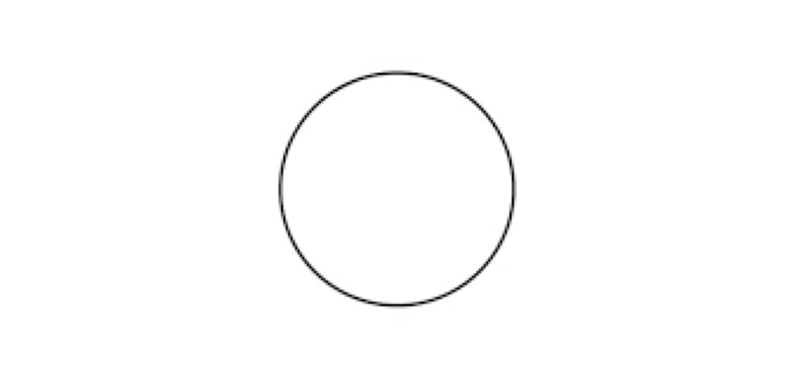

In [40]:
#display image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_mpl)
ax.axis('off')
plt.show()

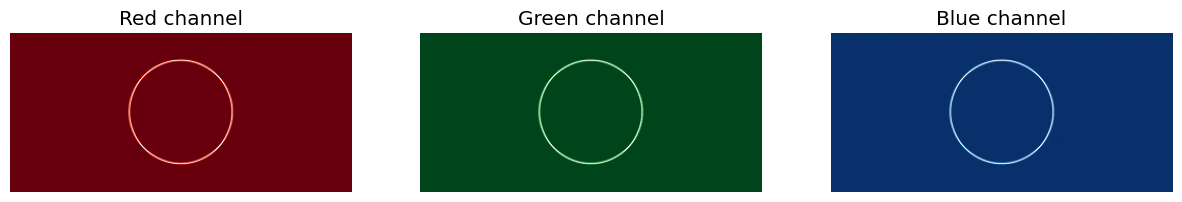

In [41]:
# Display RGB Channels of our image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_mpl[:,:,0], cmap='Reds')
axs[1].imshow(img_mpl[:,:,1], cmap='Greens')
axs[2].imshow(img_mpl[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.show()

In [42]:
#blur
img_blur = cv2.GaussianBlur(img_mpl, (15, 15), cv2.BORDER_DEFAULT)
img_blur


array([[[0.99999994, 0.99999994, 0.99999994, 0.99999994],
        [0.99999994, 0.99999994, 0.99999994, 0.99999994],
        [0.99999994, 0.99999994, 0.99999994, 0.99999994],
        ...,
        [0.99999994, 0.99999994, 0.99999994, 0.99999994],
        [0.99999994, 0.99999994, 0.99999994, 0.99999994],
        [0.9999999 , 0.9999999 , 0.9999999 , 0.9999999 ]],

       [[0.99999994, 0.99999994, 0.99999994, 0.99999994],
        [0.99999994, 0.99999994, 0.99999994, 0.99999994],
        [0.99999994, 0.99999994, 0.99999994, 0.99999994],
        ...,
        [0.99999994, 0.99999994, 0.99999994, 0.99999994],
        [0.99999994, 0.99999994, 0.99999994, 0.99999994],
        [0.9999999 , 0.9999999 , 0.9999999 , 0.9999999 ]],

       [[0.99999994, 0.99999994, 0.99999994, 0.99999994],
        [0.99999994, 0.99999994, 0.99999994, 0.99999994],
        [0.99999994, 0.99999994, 0.99999994, 0.99999994],
        ...,
        [0.99999994, 0.99999994, 0.99999994, 0.99999994],
        [0.99999994, 0.999999

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-5.4431376..4.992157].


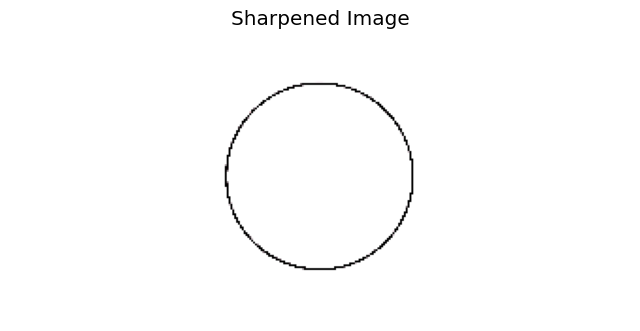

In [43]:
# Sharpen Image
# increased the sharpening to see a stronger difference
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,10,-1], 
                              [-1,-1,-1]])

sharpened = cv2.filter2D(img_mpl, -1, kernel_sharpening)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(sharpened)
ax.axis('off')
ax.set_title('Sharpened Image')
plt.show()

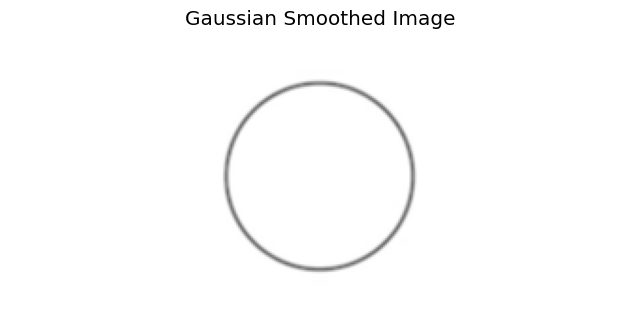

In [44]:
# 3×3 Gaussian kernel approximation
kernel_gaussian_3x3 = (1 / 16) * np.array([[1, 2, 1], 
                                           [2, 4, 2], 
                                           [1, 2, 1]])


# Apply Gaussian filter using cv2.filter2D
smoothed = cv2.filter2D(img_mpl, -1, kernel_gaussian_3x3)

# Display the smoothed image
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(smoothed)
ax.axis('off')
ax.set_title('Gaussian Smoothed Image')
plt.show()


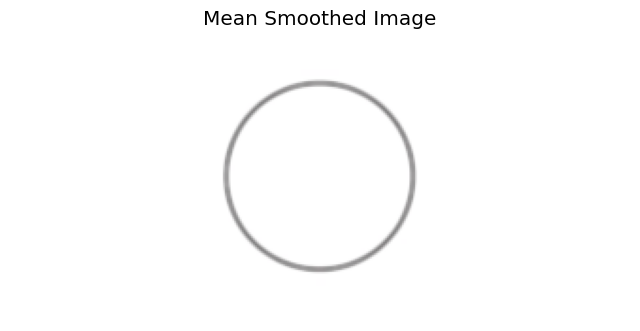

In [47]:
# 3×3 Mean filter kernel
kernel_mean_3x3 = (1 / 9) * np.array([[1, 1, 1], 
                                      [1, 1, 1], 
                                      [1, 1, 1]])

# Apply Mean filter using cv2.filter2D
smoothed_mean = cv2.filter2D(img_mpl, -1, kernel_mean_3x3)

# Display the smoothed image
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(smoothed_mean)
ax.axis('off')
ax.set_title('Mean Smoothed Image')
plt.show()

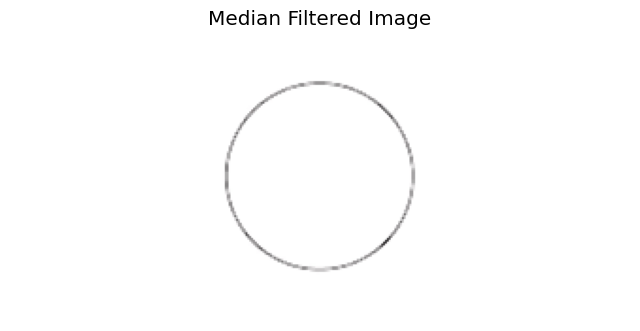

In [49]:
# Apply Median filter using cv2.medianBlur
median_filtered = cv2.medianBlur(img_mpl, 3)

# Display the median filtered image
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(median_filtered)
ax.axis('off')
ax.set_title('Median Filtered Image')
plt.show()

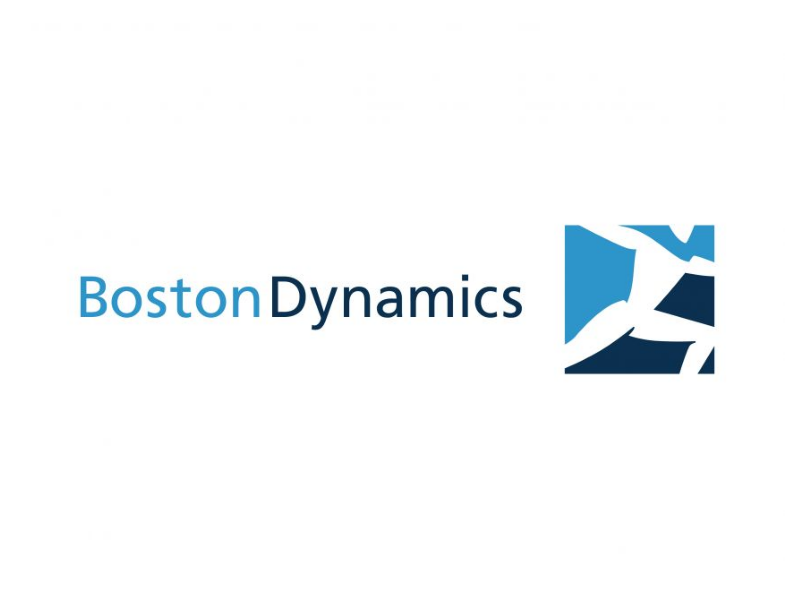

In [54]:
#display image boston dynamics
img_logo = plt.imread('logo.jpg')
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_logo)
ax.axis('off')
plt.show()

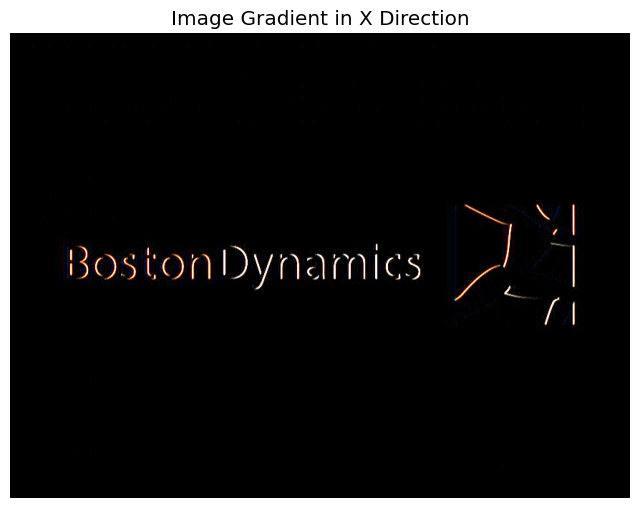

In [ ]:


# Sobel kernel for x direction
sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])

# Apply Sobel filter using cv2.filter2D
gradient_x = cv2.filter2D(img_logo, -1, sobel_x)

# Display the gradient image
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(gradient_x, cmap='gray')
ax.axis('off')
ax.set_title('Image Gradient in X Direction')
plt.show()

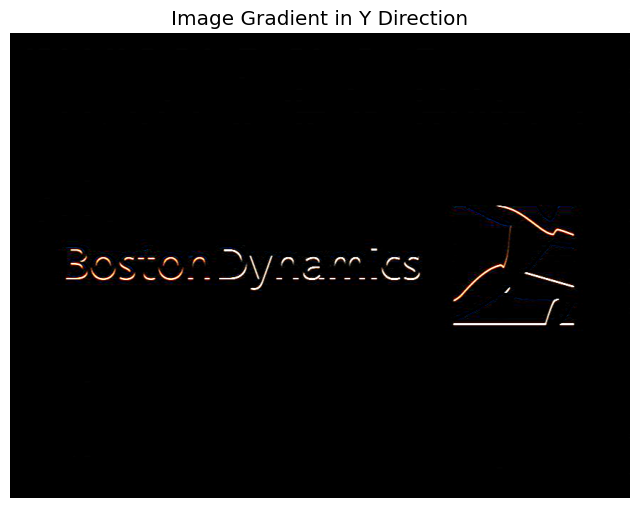

In [52]:
# Sobel kernel for y direction
sobel_y = np.array([[-1, -2, -1], 
                    [ 0,  0,  0], 
                    [ 1,  2,  1]])

# Apply Sobel filter using cv2.filter2D
gradient_y = cv2.filter2D(img_logo, -1, sobel_y)

# Display the gradient image
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(gradient_y, cmap='gray')
ax.axis('off')
ax.set_title('Image Gradient in Y Direction')
plt.show()

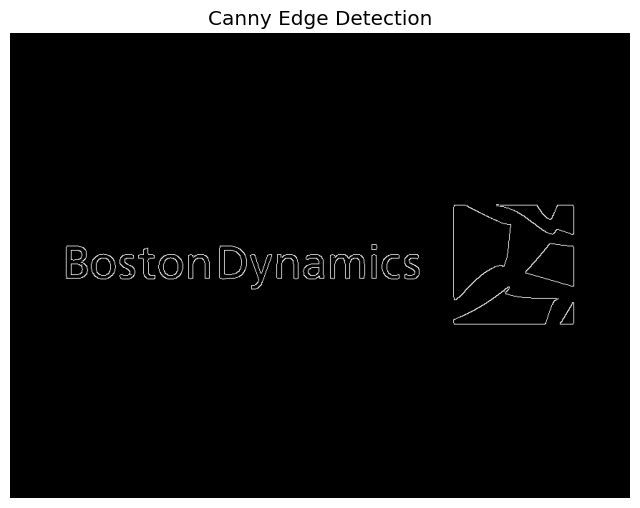

In [53]:
# Apply Canny edge detection
edges = cv2.Canny(img_logo, 100, 200)

# Display the edges
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(edges, cmap='gray')
ax.axis('off')
ax.set_title('Canny Edge Detection')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [1.2728246..1.8444666].


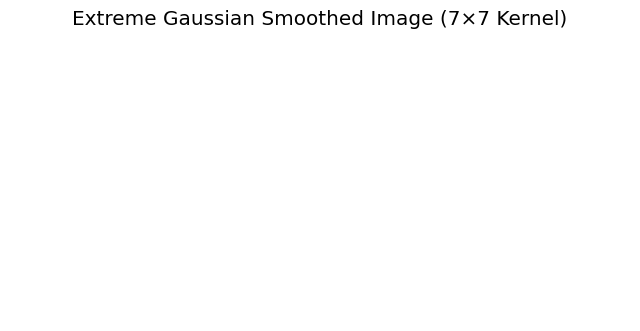

In [45]:
# Strong 7×7 Gaussian blur kernel (manually defined)
kernel_gaussian_7x7_strong = (1 / 1003) * np.array([
    [1,  6, 15, 20, 15,  6, 1], 
    [6, 24, 49, 60, 49, 24, 6], 
    [15, 49, 90, 100, 90, 49, 15], 
    [20, 60, 100, 110, 100, 60, 20], 
    [15, 49, 90, 100, 90, 49, 15], 
    [6, 24, 49, 60, 49, 24, 6], 
    [1,  6, 15, 20, 15,  6, 1]
])

# Apply Gaussian filter using cv2.filter2D
smoothed = cv2.filter2D(img_mpl, -1, kernel_gaussian_7x7_strong)


# Display the smoothed image
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(smoothed)
ax.axis('off')
ax.set_title('Extreme Gaussian Smoothed Image (7×7 Kernel)')
plt.show()

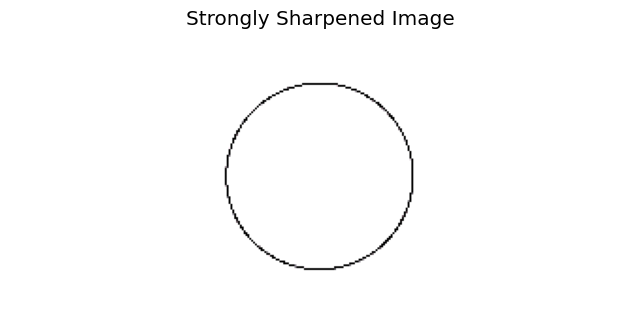

In [46]:
# Load image with Matplotlib
img_mpl = plt.imread('input2.jpg')

# Convert float images (from plt.imread) to uint8 if necessary
if img_mpl.dtype == np.float32 or img_mpl.dtype == np.float64:
    img_mpl = (img_mpl * 255).astype(np.uint8)

# Convert RGB (Matplotlib) to BGR (OpenCV)
img_bgr = cv2.cvtColor(img_mpl, cv2.COLOR_RGB2BGR)

# Strong sharpening kernel
kernel_strong_sharpening = np.array([[-1, -1, -1], 
                                     [-1, 12, -1], 
                                     [-1, -1, -1]])
# Apply sharpening filter
sharpened_bgr = cv2.filter2D(img_bgr, -1, kernel_strong_sharpening)

# Convert back BGR to RGB for Matplotlib display
sharpened_rgb = cv2.cvtColor(sharpened_bgr, cv2.COLOR_BGR2RGB)

# Display the sharpened image
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(sharpened_rgb)
ax.axis('off')
ax.set_title('Strongly Sharpened Image')
plt.show()